# Food Allergens and Allergies

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 10,6

In [3]:
allerg = pd.read_csv('... PET_project\\allergies\\FoodData.csv')

In [4]:
allerg.head()

,Class,Type,Group,Food,Allergy
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy
1,Plant origin,Fruit,Pome fruit,Apple,Oral Allergy Syndrome
2,Plant origin,Fruit,Stone fruit,Apricot,Stone Fruit Allergy
3,Plant origin,Vegetable,Composite vegetable,Artichoke,Insulin Allergy
4,Plant origin,Vegetable,Liliaceous vegetable,Asparagus,Allium Allergy


In [5]:
allerg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Class    184 non-null    object
 1   Type     184 non-null    object
 2   Group    184 non-null    object
 3   Food     184 non-null    object
 4   Allergy  162 non-null    object
dtypes: object(5)
memory usage: 7.3+ KB


In [6]:
allerg.describe()

,Class,Type,Group,Food,Allergy
count,184,184,184,184,162
unique,3,14,33,183,39
top,Plant origin,Vegetable,Cruciferous vegetable,Peas,Legume Allergy
freq,146,64,15,2,14


There are 183 unique food items in the dataset (that are allergens) and 39 types of allergies.\
Among allergens:\
    3 classes,\
    14 types,\
    33 groups of them.

Let's look closer at their distribution.


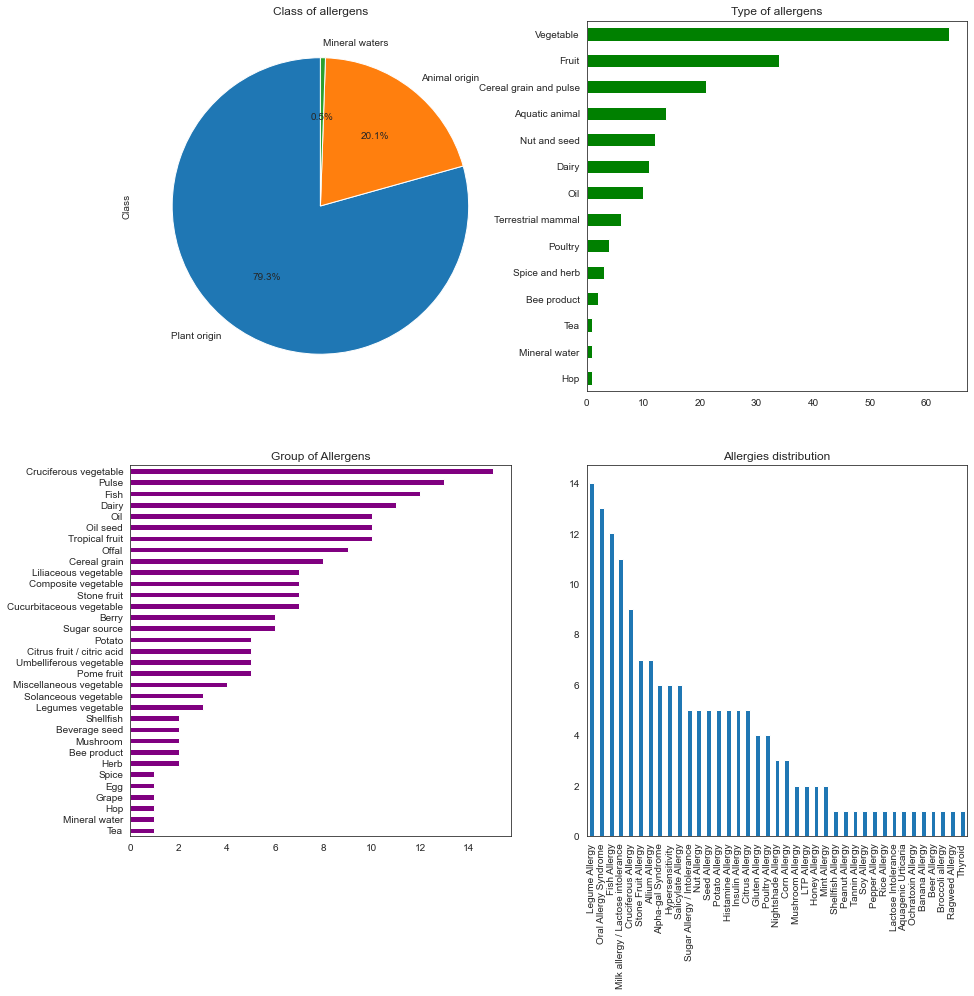

In [7]:
sns.set_style('white')
f, axes = plt.subplots(2,2, figsize=(15,15))

d1=allerg['Class'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', startangle=90, title = 'Class of allergens', ax=axes[0,0])
d2=allerg['Type'].value_counts().sort_values(ascending=True).plot(kind = 'barh', title = 'Type of allergens', color = 'green', ax=axes[0,1])
d3=allerg['Group'].value_counts().sort_values(ascending=True).plot(kind = 'barh', title = 'Group of Allergens', \
                                            color='purple', ax=axes[1,0])
d4=allerg['Allergy'].value_counts().plot(kind = 'bar', title = 'Allergies distribution', ax=axes[1,1])

plt.show()


#### 79.3%  of allergens are plant origin, 20.1 % - animal origin and just 0.5 % - mineral waters.
#### 3 most prevalent types of allergens are Vegetables, Fruits, Cereal grain and pulse(beans, peas) and they are of plant origin.
#### Top 5 groups of allergens are cruciferous vegetable(cabbage, broccolli, arugula), pulse, fish, dairy and oil.
#### Among allergies the most common are - legume(for beans, peas), oral, fish , milk/lactose intolerance and cruciferous allergies (for cabbage, broccolli, arugula).

---

### Let's have more detailed analisys.

Look closer at different types of allergens regarding their origin.

In [8]:
# Filter allergens by origin - plant or animal. 
a_class_plant = allerg[allerg.Class == 'Plant origin']
a_class_animal = allerg[allerg.Class == 'Animal origin']

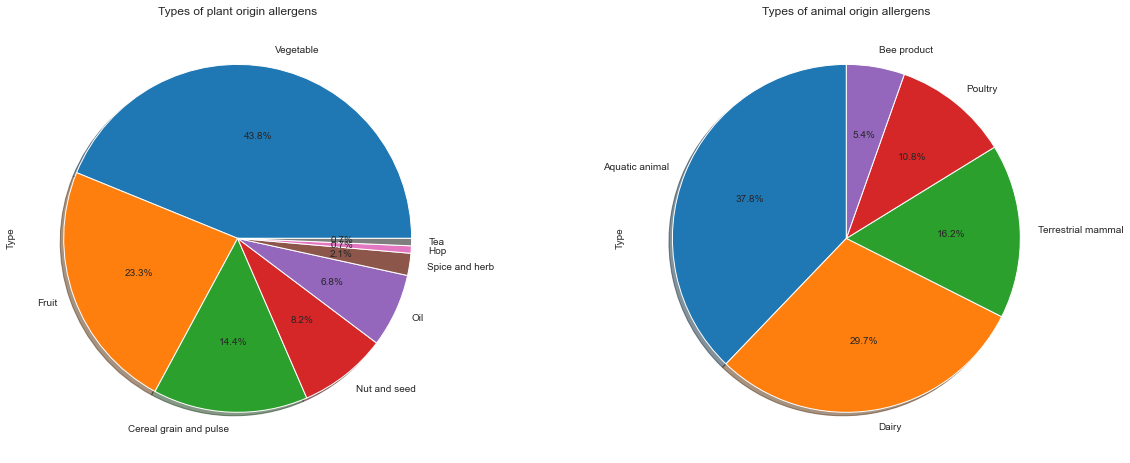

In [9]:
f, axes = plt.subplots(1,2, figsize=(20,8))
t1 = a_class_plant['Type'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', title = 'Types of plant origin allergens', shadow=True, ax=axes[0])
t2 = a_class_animal['Type'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', title = 'Types of animal origin allergens', startangle=90, shadow=True, ax=axes[1])
plt.show()

81.5 % of plant origin allergens are consisted of just 3 types, which are Vegetables, Fruits and Cereal grain and pulse, and almost half of them - 43.8 % are Vegelables.\
83.7% of animal origin allergens are also consisted of 3 types - Aquatic animal, Dairy and Terrestrial mammals with almost 1/3 of all - Aquatic animal (37.8 %).


It's interesting to find out what groups of allergens(food) are included in each top type - Vegetables, Fruit, Cereal Grain and pulse, Aquatic animals, Dairy and Terrestrial mammals.

In [10]:
allerg[allerg.Type == 'Vegetable'].Group.value_counts()

Cruciferous vegetable       15
Composite vegetable          7
Liliaceous vegetable         7
Cucurbitaceous vegetable     7
Sugar source                 6
Umbelliferous vegetable      5
Potato                       5
Miscellaneous vegetable      4
Solanceous vegetable         3
Legumes vegetable            3
Mushroom                     2
Name: Group, dtype: int64

In [11]:
allerg[allerg.Group == 'Cruciferous vegetable'].Food.value_counts()

Broccoli            1
Brussels sprouts    1
Cabbage             1
Cauliflower         1
Chinese cabbage     1
Horseradish         1
Kale                1
Kyona               1
Mustard Spinach     1
Qing-geng-cai       1
Radish leaf         1
Radish root         1
Turnip leaf         1
Turnip root         1
Watercress          1
Name: Food, dtype: int64

In [12]:
allerg[allerg.Type == 'Fruit'].Group.value_counts()

Tropical fruit                10
Stone fruit                    7
Berry                          6
Pome fruit                     5
Citrus fruit / citric acid     5
Grape                          1
Name: Group, dtype: int64

In [13]:
allerg[allerg.Group == 'Tropical fruit'].Food.value_counts()

Avocado               1
Banana                1
Date                  1
Guava                 1
Japanese persimmon    1
Kiwi                  1
Mango                 1
Papaya                1
Passion fruit         1
Pineapple             1
Name: Food, dtype: int64

In [14]:
allerg[allerg.Group == 'Stone fruit'].Food.value_counts()

Apricot          1
Cherry           1
Japanese plum    1
Mume plum        1
Nectarine        1
Peach            1
Prune            1
Name: Food, dtype: int64

In [15]:
allerg[allerg.Type == 'Cereal grain and pulse'].Group.value_counts()

Pulse           13
Cereal grain     8
Name: Group, dtype: int64

In [16]:
allerg[allerg.Group == 'Pulse'].Food.value_counts()

Bean               1
Black-eyed bean    1
Broad bean         1
Butter bean        1
Lentil             1
Lima bean          1
Peanut             1
Peas               1
Pegia              1
Soybean            1
Sultani            1
Sultapya           1
White bean         1
Name: Food, dtype: int64

In [17]:
allerg[allerg.Type == 'Aquatic animal'].Group.value_counts()

Fish         12
Shellfish     2
Name: Group, dtype: int64

In [18]:
allerg[allerg.Type == 'Terrestrial mammal'].Group.value_counts()

Offal    6
Name: Group, dtype: int64

In [19]:
allerg[allerg.Type == 'Terrestrial mammal'].Food.value_counts()

Cattle    1
Deer      1
Goat      1
Horse     1
Pig       1
Sheep     1
Name: Food, dtype: int64

So, the most widely spread allergens of plant origin are Vegetables, Fruit, Cereal grain and pulse and of animal origin: Aquatic animals, Dairy, Terrestrial mammals.


What food/allergens are included in these groups and are the most common there:



Vegetables - Cruciferous vegetables (broccolli, cabbages, leaves), Composite vegetable(Artichoke, lettuce..), Liliaceous vegetable(Onion, garlic, asparagus..), Cucurbitaceous vegetable(cucumber, pumpkin, watermelon..).

Cereal grain and pulse - peas, beans, corns, rice, wheat, barley, etc.

Fruits - 2 groups - Tropical fruits (kiwi, mango, pineapple,avocado..) and Stone fruits (apricot, plums, peaches..). 

Aquatic animals - mostly fish and some shellfish.

Dairy - butter, milk, yogurt, cream, cheese and so on.

Terrestrial mammals - offal (meat of cattle, goats, pig, sheep..).

---

### Food Allergies.

There are 39 types of food allergies in this dataset.\
Their distribution are:

In [20]:
allerg.Allergy.value_counts().head(10)

Legume Allergy                        14
Oral Allergy Syndrome                 13
Fish Allergy                          12
Milk allergy / Lactose intolerance    11
Cruciferous Allergy                    9
Stone Fruit Allergy                    7
Allium Allergy                         7
Alpha-gal Syndrome                     6
Hypersensitivity                       6
Salicylate Allergy                     6
Name: Allergy, dtype: int64

As we can see, the top 5 are - legume(for beans, peas), oral, fish , milk/lactose intolerance and cruciferous allergies (for cabbage, broccolli, arugula).\
Let's check what kind of allergies are the most spread regarding origin of the allergens.

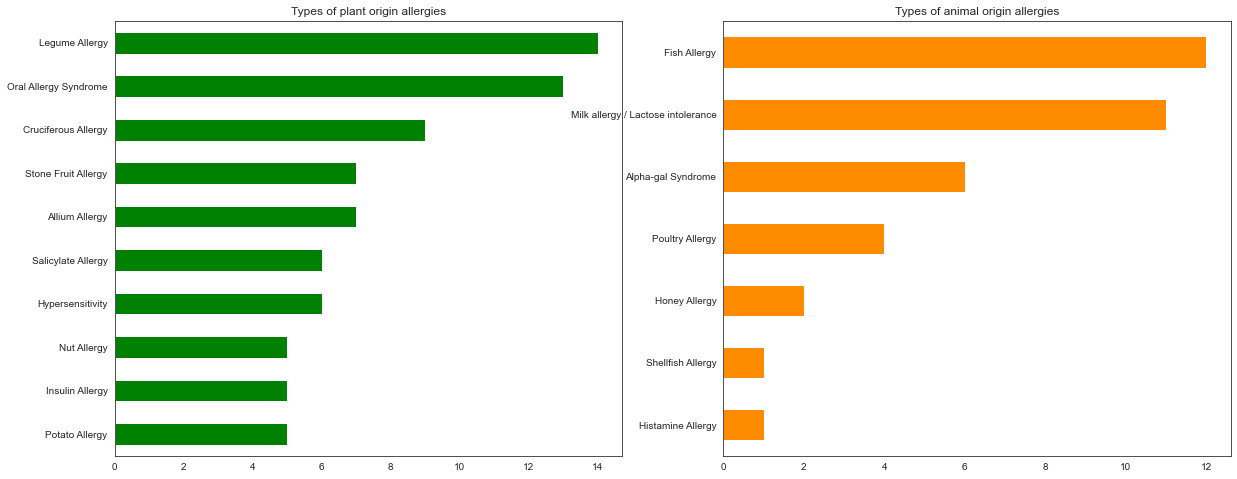

In [21]:
f, axes = plt.subplots(1,2, figsize=(20,8))
a1 = a_class_plant['Allergy'].value_counts().sort_values(ascending=True).tail(10).plot(kind = 'barh', title = 'Types of plant origin allergies', color = 'green', ax=axes[0])
a2 = a_class_animal['Allergy'].value_counts().sort_values(ascending=True).plot(kind = 'barh', title = 'Types of animal origin allergies', color = 'darkorange', ax=axes[1])
plt.show()

It's understandable what food cause legume allergy (beans, peas..), fish and milk/lactose intolerance allergies, cruciferous allergy(cabbage, broccolli..) stone fruit allergy.
But what food cause oral allergy syndrome, alpha-gal syndrome and allium allergy?
Let's find out.

In [22]:
allerg[allerg.Allergy == 'Oral Allergy Syndrome'].Group.value_counts()

Tropical fruit    8
Pome fruit        5
Name: Group, dtype: int64

In [23]:
allerg[allerg.Group == 'Pome fruit'].Food.value_counts()

Apple            1
Japanese pear    1
Loquat           1
Pear             1
Quince           1
Name: Food, dtype: int64

In [24]:
allerg[allerg.Allergy == 'Alpha-gal Syndrome'].Group.value_counts()

Offal    6
Name: Group, dtype: int64

In [25]:
allerg[allerg.Allergy == 'Allium Allergy'].Food.value_counts()

Asparagus    1
Garlic       1
Leek         1
Nira         1
Onion        1
Shallot      1
Welsh        1
Name: Food, dtype: int64

Now it's clear that Oral allergy syndrome is caused by tropical fruits and pome fruits(apple, pears etc.).\
Alpha-gal syndrome is caused by offals.\
Allium allergy is caused by Liliaceous vegetable(Onion, garlic, asparagus, etc.).